In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv


In [37]:
df=pd.read_csv("/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [39]:
df.columns = df.columns.str.strip()

In [40]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [41]:
df = df.drop(['CustomerId', 'Surname','RowNumber'], axis=1)

In [42]:
df


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [45]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [48]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [52]:
df['Gender'].replace({'Female': 1, 'Male': 0}, inplace=True)

In [56]:
df2=pd.get_dummies(data=df,columns=['Geography'],dtype=int)
df2

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [57]:
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
column_scaled=['CreditScore','Balance','EstimatedSalary']
df2_scaled=scaler.fit_transform(df2[column_scaled])
df2[column_scaled]=df2_scaled
df2

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,42,2,0.000000,1,1,1,0.506735,1,1,0,0
1,0.516,1,41,1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,1,42,8,0.636357,3,1,0,0.569654,1,1,0,0
3,0.698,1,39,1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,1,43,2,0.500246,1,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,39,5,0.000000,2,1,0,0.481341,0,1,0,0
9996,0.332,0,35,10,0.228657,1,1,1,0.508490,0,1,0,0
9997,0.718,1,36,7,0.000000,1,0,1,0.210390,1,1,0,0
9998,0.844,0,42,3,0.299226,2,1,0,0.464429,1,0,1,0


In [60]:
X=df2.drop('Exited',axis=1)
y=df2['Exited']

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)

In [64]:
X_train.shape

(7000, 12)

In [63]:
import tensorflow as tf
from tensorflow import keras

In [66]:
model=keras.Sequential([
    keras.layers.Dense(12,input_shape=(12,),activation='relu'),
     keras.layers.Dense(6,activation='relu'),
     keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.5568 - accuracy: 0.7854
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.7914
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7914
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4543 - accuracy: 0.7914
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.7914
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.7914
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.7914
Epoch 8/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4422 - accuracy: 0.7914
Epoch 9/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.7914
Epoch 10/100
219/219 [==============================] - 0s 1ms/step - loss: 0.4403 - accura

In [68]:
yp=model.predict(X_test)

94/94 [==============================] - 0s 1ms/step


In [69]:
yp[0]

array([0.04693843], dtype=float32)

In [73]:
y_pred=[]
for i in yp:
    if i<0.5:
        y_pred.append(0)
    else:
        y_pred.append(1)

In [76]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [72]:
y_test[:10]

9957    0
1687    0
2116    0
231     0
2780    0
4578    0
8260    0
8557    0
9523    0
802     0
Name: Exited, dtype: int64

In [79]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2423
           1       0.59      0.37      0.46       577

    accuracy                           0.83      3000
   macro avg       0.73      0.65      0.68      3000
weighted avg       0.81      0.83      0.81      3000



Text(95.72222222222221, 0.5, 'Truth')

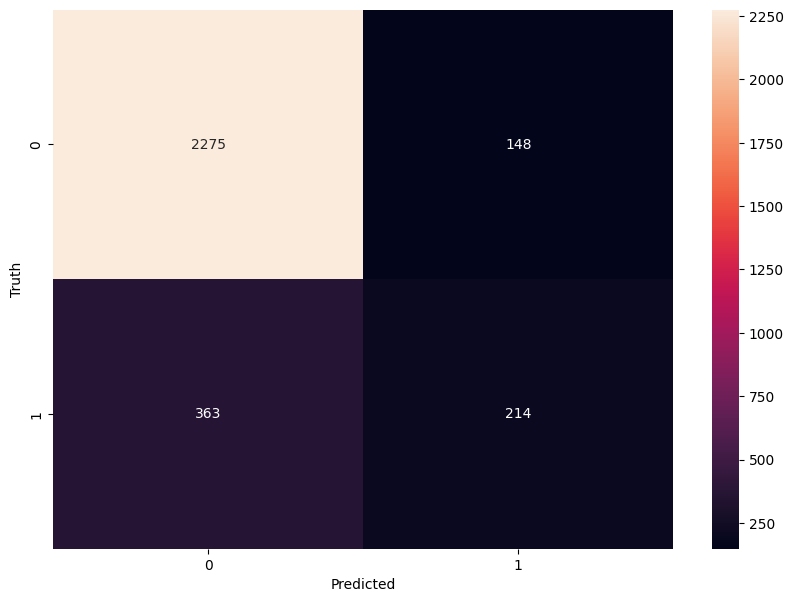

In [81]:
import seaborn as sn
import matplotlib.pyplot as plt
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')